# Multiple Linear Regression on Customer Data - statsmodels

### Agenda

- We have understood linear regression and also learnt how to implement it in R. Today we will understand how to implement linear regression in python
    - Using statsmodels module to create a plain vanilla linear regression, understanding diagnostic plots,  vif etc ( this is more of a statistical way of understanding data and predicting on an unseen data
    - Another way is more of implementation with bare essential stress on diagnostics but more concern is about how the model is working on an unseen dataset 

### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times|\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\mid\dfrac{\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}}{y_{i}}\mid$$


### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import math

import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Somagiri\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Loading the data

In [2]:
data = pd.read_csv("CustomerData.csv", header=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

### Data Understanding

In [4]:
data.shape

(3209, 14)

#### Display the columns

In [5]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=3209, step=1)

#### See the top rows of the data

In [7]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


#### Summary Statistics using describe()

Descriptive or Summary Statistic of the numeric columns

    It excludes character column and calculate summary statistics only for numeric columns

In [8]:
data.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


Summary statistics of the character columns

In [9]:
data.describe(include=['object'])

,FavoriteChannelOfTransaction,FavoriteGame
count,3209,3209
unique,2,2
top,Favorite,Uniform
freq,2637,3083


In [10]:
data['FavoriteGame'].value_counts()

Uniform     3083
Favorite     126
Name: FavoriteGame, dtype: int64

Summary statistics of all the columns

In [11]:
data.describe(include='all')

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


#### Data type of each of the variable

In [12]:
data.dtypes 

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

### Data Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

#### Check and delete CustomerID attribute

In [13]:
np.size(np.unique(data.CustomerID, return_counts=True)[0])

3209

In [14]:
np.unique(data.FavoriteGame, return_counts=True)

(array(['Favorite', 'Uniform'], dtype=object),
 array([ 126, 3083], dtype=int64))

In [15]:
data.drop('CustomerID', axis=1, inplace=True)

#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type .

In [16]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [17]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [18]:
data.describe(include='all')

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Observe how many records have values 113 as age of the children

In [19]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


In [20]:
print (data.shape)

(3209, 13)


#### Removing outliers

    Ignore records with age as 113

In [21]:
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 

In [22]:
print (data.shape)

(3189, 13)


#### Missing Data

    pandas primarily uses the value np.nan to represent missing data. 

Check for missing value

    is.null() output boolean i.e. if missing value then true else false. 

    sum function counts 'true' thus gives total number of missing values

In [23]:
data.isnull().sum()

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb


    If the perticular row/column has more number of missing values then drop that perticular rows/column 
    
        e.g. To drop any rows that have missing data use data.dropna(axis=0, inplace=True) 
        
    Otherwise, impute/fill missing data based on domain knowledge or using imputation techniques
        
        e.g. To fill missing values with mean use data.fillna(data.mean(), inplace=True)      

In [24]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

#### Correlation between numeric attributes 

In [25]:
num_attr = data.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated'],
      dtype='object')

If the correlation coefficient is one, the variables have a perfect positive correlation. 

    This means that if one variable moves a given amount, the second moves proportionally in the same direction. 

If correlation coefficient is zero, no relationship exists between the variables. 

    If one variable moves, you can make no predictions about the movement of the other variable; they are uncorrelated.

If correlation coefficient is –1, the variables are perfectly negatively correlated (or inversely correlated) and move in opposition to each other.

    If one variable increases, the other variable decreases proportionally. 

In [26]:
data[num_attr].corr()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
NoOfChildren,1.000000,-0.352499,0.461332,0.086583,0.138507,0.138244,0.166536,0.214226,0.131843,0.108509
MinAgeOfChild,-0.352499,1.000000,0.267846,-0.163155,-0.101041,-0.091638,-0.090152,-0.117580,-0.085494,-0.027536
MaxAgeOfChild,0.461332,0.267846,1.000000,-0.044098,-0.004977,-0.012761,-0.002393,0.017606,-0.011047,0.001929
Tenure,0.086583,-0.163155,-0.044098,1.000000,0.192672,0.191555,0.240035,0.271724,0.187720,0.115241
FrquncyOfPurchase,0.138507,-0.101041,-0.004977,0.192672,1.000000,0.933894,0.278690,0.396333,0.947788,0.662371
NoOfUnitsPurchased,0.138244,-0.091638,-0.012761,0.191555,0.933894,1.000000,0.310436,0.434564,0.868113,0.749679
FrequencyOFPlay,0.166536,-0.090152,-0.002393,0.240035,0.278690,0.310436,1.000000,0.738154,0.285390,0.231888
NoOfGamesPlayed,0.214226,-0.117580,0.017606,0.271724,0.396333,0.434564,0.738154,1.000000,0.397942,0.291398
NoOfGamesBought,0.131843,-0.085494,-0.011047,0.187720,0.947788,0.868113,0.285390,0.397942,1.000000,0.494442
TotalRevenueGenerated,0.108509,-0.027536,0.001929,0.115241,0.662371,0.749679,0.231888,0.291398,0.494442,1.000000


C:\Users\Somagiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


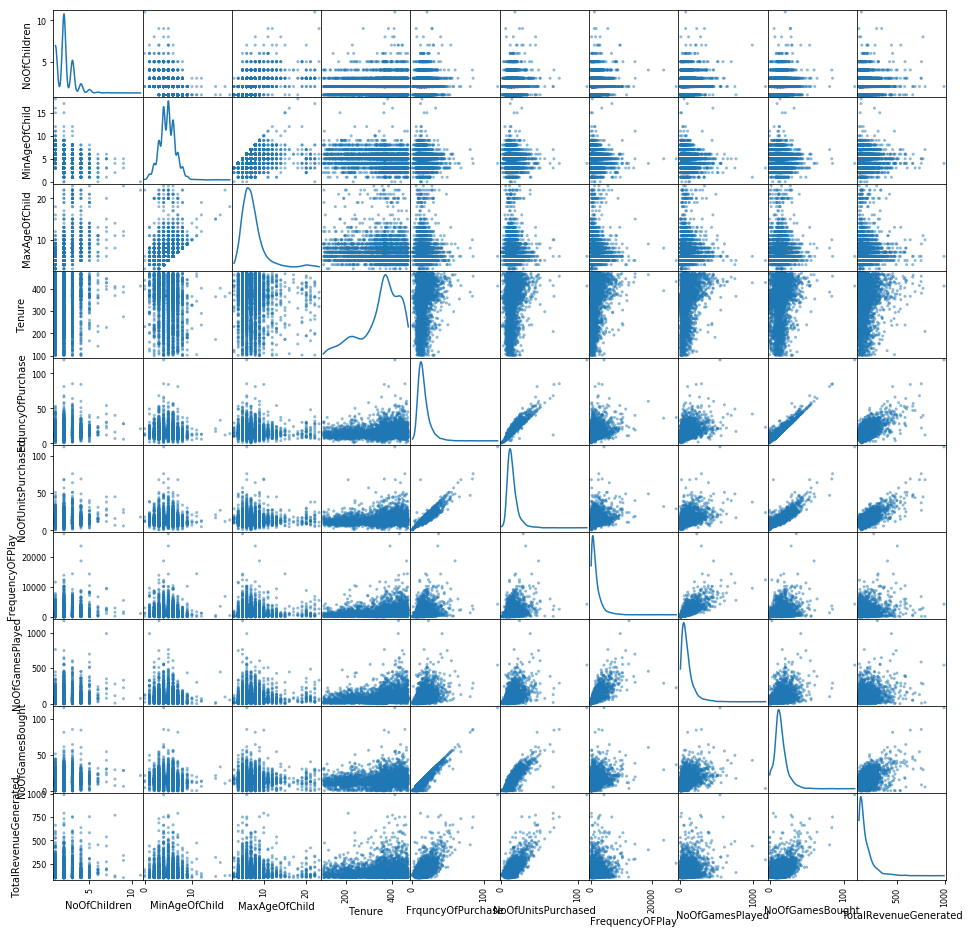

In [27]:
pd.scatter_matrix(data, figsize=(16, 16), diagonal='kde')
plt.show()

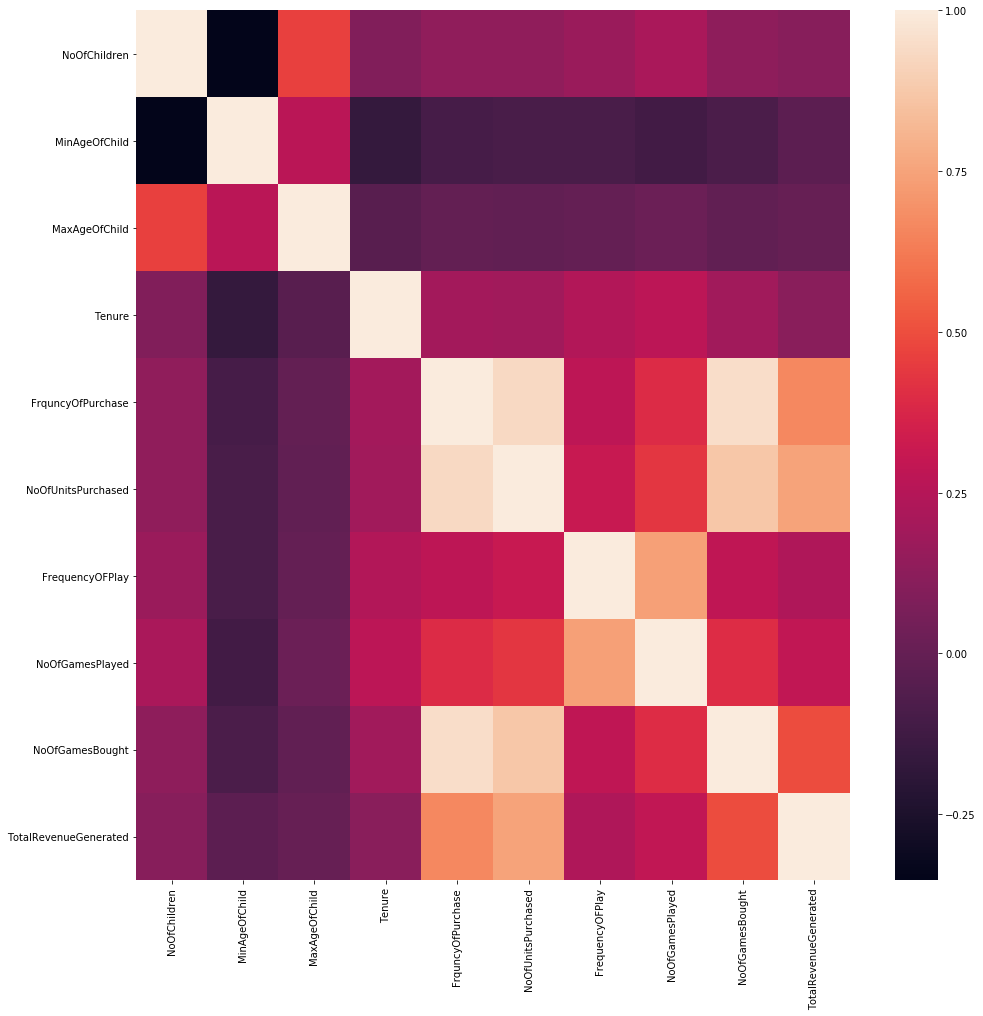

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

### Exploratory Data Analysis

#### Uni-variate Analysis

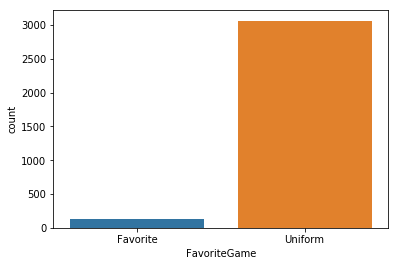

In [29]:
# Plotting Categorical Data
sns.countplot(x="FavoriteGame", data=data)
plt.show()

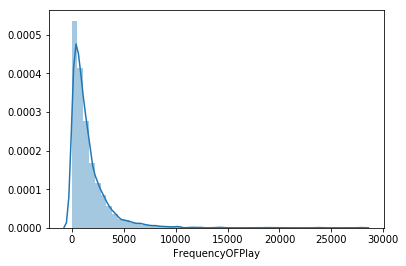

In [30]:
# Plotting Numerical Data

# Make default histogram of FrequencyOFPlay
sns.distplot(data["FrequencyOFPlay"] )
# Bins can be changes
plt.show()

#### Bi-variate Analysis

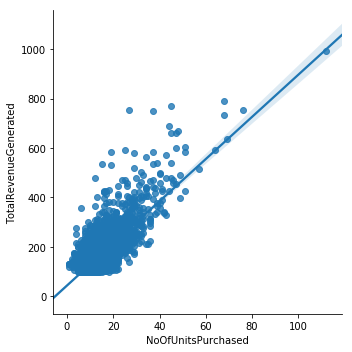

In [31]:
# Plotting Numeric VS Numeric Data
#This function lmplot from seaborn combines regplot() and FacetGrid. 
#It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

sns.lmplot(x='NoOfUnitsPurchased', y='TotalRevenueGenerated', data=data)
plt.show()

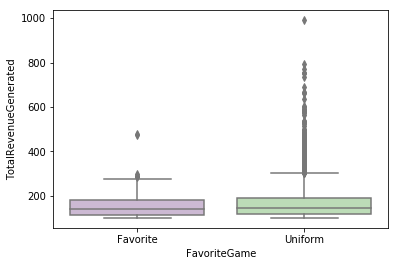

In [32]:
    # Plotting Numeric VS Categorical Data

    sns.boxplot(x="FavoriteGame", y="TotalRevenueGenerated", data=data, palette="PRGn")
    plt.show()

## Building a Linear Model

### Simple Linear Regression

In [33]:
### Simple Linear Regression using Statsmodels package
##To get all except the target ant target
data.columns
print(data.columns.values[-1])
print(data.columns.values[:-1])

TotalRevenueGenerated
['City' 'NoOfChildren' 'MinAgeOfChild' 'MaxAgeOfChild' 'Tenure'
 'FrquncyOfPurchase' 'NoOfUnitsPurchased' 'FrequencyOFPlay'
 'NoOfGamesPlayed' 'NoOfGamesBought' 'FavoriteChannelOfTransaction'
 'FavoriteGame']


In [34]:
#Creating the formula
x='+'.join(data.columns.values[:-1])
x

'City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame'

In [35]:
formula = " ~ ".join((data.columns.values[-1],x))
print (formula)

TotalRevenueGenerated ~ City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame


#### Model fit and summary

Fitting a model in statsmodels typically involves 3 easy steps:

    Use the model class to describe the model
    Fit the model using a class method
    Inspect the results using a summary method


In [36]:
lm_mod = ols(formula=formula, data=data) # Describe model

result = lm_mod.fit()                           # Fit model

#print(result.summary())                      # Summarize model

In [37]:
print(result.summary2())

                              Results: Ordinary least squares
Model:                     OLS                         Adj. R-squared:           0.720     
Dependent Variable:        TotalRevenueGenerated       AIC:                      33094.3593
Date:                      2018-12-22 19:12            BIC:                      33173.2363
No. Observations:          3189                        Log-Likelihood:           -16534.   
Df Model:                  12                          F-statistic:              684.7     
Df Residuals:              3176                        Prob (F-statistic):       0.00      
R-squared:                 0.721                       Scale:                    1873.8    
-------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
Intercept         

##### Befor getting into the multicollinearity part- lets look into the diagnostic plots

##### Residual vs Fitted plot

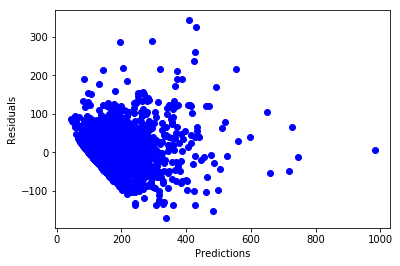

In [38]:
preds_tr=result.predict(exog=data)
plt.figure()
plt.plot(preds_tr,result.resid,'bo')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show(block=True)



#### qqplot

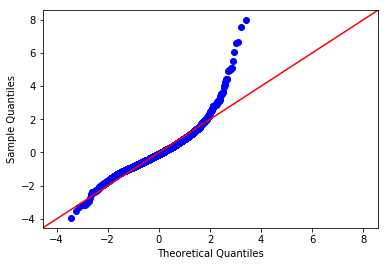

In [39]:
inf=result.get_influence()
sm.qqplot(inf.resid_studentized_internal,line='45')
plt.show(block=True)

##### Residuals and Leverage

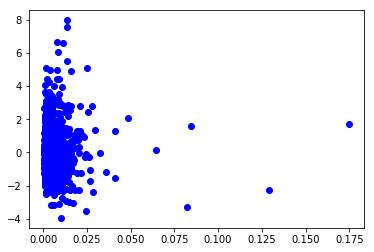

In [40]:
leverage=inf.hat_matrix_diag
plt.figure()
plt.plot(leverage,inf.resid_studentized_internal,'bo')
plt.show(block=True)

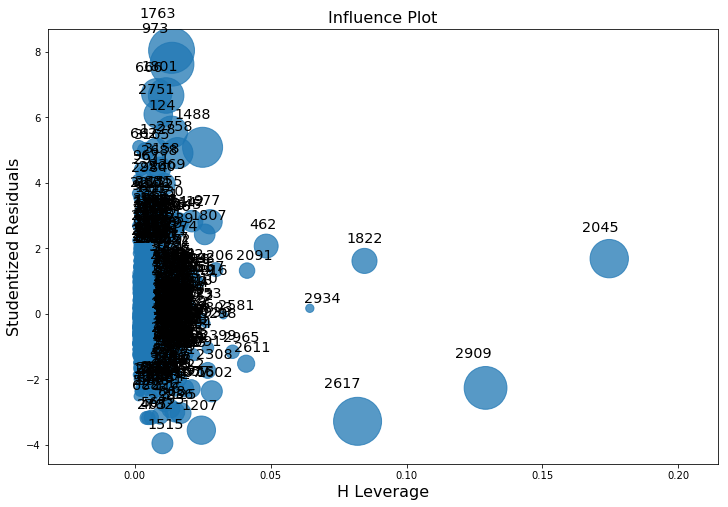

In [41]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result, alpha  = 0.05, ax = ax, criterion="cooks")
plt.show(block=True)

In [42]:
##Remove have leverage points 
subset = ~data.index.isin(["2617", "2909", "2045","1763","973"])
lm_model2 = ols(formula, data=data, subset=subset).fit()
print(lm_model2.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.719
Model:                               OLS   Adj. R-squared:                  0.718
Method:                    Least Squares   F-statistic:                     676.2
Date:                   Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                           19:12:37   Log-Likelihood:                -16439.
No. Observations:                   3184   AIC:                         3.290e+04
Df Residuals:                       3171   BIC:                         3.298e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [43]:
#There is an indication given in the result that there might exist a strong multicollinearity in the data. 
#Lets use variance inflation factor (VIF) to understand if there exist a multicollinearity and remove those attributes
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=data[num_attr]
Xdata['intercept']=1
Xdata=Xdata[['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought','intercept']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values

C:\Users\Somagiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
vif

,Vif,Variables
0,1.926384,NoOfChildren
1,1.592169,MinAgeOfChild
2,1.761091,MaxAgeOfChild
3,1.114263,Tenure
4,19.765426,FrquncyOfPurchase
5,8.404875,NoOfUnitsPurchased
6,2.211990,FrequencyOFPlay
7,2.520323,NoOfGamesPlayed
8,10.229734,NoOfGamesBought
9,40.665639,intercept


- Now we can try removing the attributes with high vif values and check how is it affecting our model. 
- Lets consider removing Frequency of purchase

In [45]:
lm_mod3=ols(formula,data=data,drop_cols=['FrquncyOfPurchase'],subset=subset)
result3 = lm_mod3.fit()
print(result3.summary2())

                             Results: Ordinary least squares
Model:                    OLS                         Adj. R-squared:           0.664     
Dependent Variable:       TotalRevenueGenerated       AIC:                      33465.6562
Date:                     2018-12-22 19:12            BIC:                      33538.4469
No. Observations:         3184                        Log-Likelihood:           -16721.   
Df Model:                 11                          F-statistic:              571.6     
Df Residuals:             3172                        Prob (F-statistic):       0.00      
R-squared:                0.665                       Scale:                    2140.8    
------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------------------------------
Intercept                    

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
data.head(3)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01


In [48]:
train,test = train_test_split(data,test_size=.30,random_state=123)

In [49]:
print(train.shape)
print(test.shape)


(2232, 13)
(957, 13)


In [50]:
train.head(3)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
1866,1,3,6,6,346,18,16,2930,150,9,Favorite,Uniform,229.56
1002,1,2,5,8,292,19,13,658,52,19,Favorite,Uniform,140.00
2657,1,3,5,11,347,21,27,137,28,0,Favorite,Uniform,399.85


In [51]:
mod_lm = ols(formula=formula, data=train) # Describe model
res = mod_lm.fit()                           # Fit model
print(res.summary2())                      # Summarize model

                              Results: Ordinary least squares
Model:                     OLS                         Adj. R-squared:           0.712     
Dependent Variable:        TotalRevenueGenerated       AIC:                      23059.6468
Date:                      2018-12-22 19:12            BIC:                      23133.8853
No. Observations:          2232                        Log-Likelihood:           -11517.   
Df Model:                  12                          F-statistic:              459.8     
Df Residuals:              2219                        Prob (F-statistic):       0.00      
R-squared:                 0.713                       Scale:                    1785.9    
-------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
Intercept         

###### Evaluating model performance

In [52]:
pred_test=res.predict(test)
MAE=np.mean(abs(np.array(test.iloc[:,-1])-np.array(pred_test)))
print("The Mean Absolute Error on test data is: ",MAE)

The Mean Absolute Error on test data is:  32.51085238144374


In [53]:
#To compute mean absolute percentage error
MAPE=np.mean(abs((np.array(test.iloc[:,-1])-np.array(pred_test))/np.array(test.iloc[:,-1])))
print("The Mean Absolute Percentage Error on test data is: ",MAPE*100)

The Mean Absolute Percentage Error on test data is:  19.366594739239506


In [54]:
#To compute Root mean squared error

RMSE=np.sqrt(np.mean((np.array(test.iloc[:,-1])-np.array(pred_test))**2))

print("The Root Mean Square Error on test data is: ",RMSE)

The Root Mean Square Error on test data is:  45.8895507469792


In [55]:
# To compute mean squared error

MSE=np.mean((np.array(test.iloc[:,-1])-np.array(pred_test))**2)
print("The Mean Square Error on test data is: ",MSE)

The Mean Square Error on test data is:  2105.850867759579


#### What if we transform the target

In [56]:
data['logT']=np.log(data['TotalRevenueGenerated'])

In [57]:
data1=data.drop('TotalRevenueGenerated',axis=1)
data1.head(3)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,logT
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,4.677584
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,5.946467
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,4.905349


In [58]:
x='+'.join(data1.columns.values[:-1])
formula = " ~ ".join((data1.columns.values[-1],x))
print (formula)


logT ~ City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame


In [59]:
train1,test1 = train_test_split(data1,test_size=0.3,random_state=123)

In [60]:
mod_lm_T = ols(formula=formula, data=train1) # Describe model
res_T = mod_lm_T.fit()                           # Fit model
print(res_T.summary2())                      # Summarize model

                            Results: Ordinary least squares
Model:                      OLS                     Adj. R-squared:            0.651    
Dependent Variable:         logT                    AIC:                       -482.1739
Date:                       2018-12-22 19:13        BIC:                       -407.9354
No. Observations:           2232                    Log-Likelihood:            254.09   
Df Model:                   12                      F-statistic:               347.5    
Df Residuals:               2219                    Prob (F-statistic):        0.00     
R-squared:                  0.653                   Scale:                     0.046901 
----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------
Intercept                                4.4779   

In [61]:
pred_test_1=res_T.predict(test1)
x1=np.exp(pred_test_1)
x2=np.exp(test1.iloc[:,-1])

In [62]:
MAE=np.mean(abs(x2-x1))
print("The Mean Absolute Error on test data is: ",MAE)

The Mean Absolute Error on test data is:  37.219599257841146


In [63]:
RMSE=np.sqrt(np.mean((x2-x1)**2))

print("The Root Mean Square Error on test data is: ",RMSE)

The Root Mean Square Error on test data is:  158.22558134510726


In [64]:
MSE=np.mean((x2-x1)**2)
print("The Mean Square Error on test data is: ",MSE)

The Mean Square Error on test data is:  25035.33459199715


#### sklearn- most of the algorithms in the this modules need data to be in the numeric format hence we need to dummy the categorical attributes

In [72]:
#### 
from sklearn.linear_model import LinearRegression

In [73]:
cols=['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']
train_dum=pd.get_dummies(columns=cols,data=train,prefix=cols,prefix_sep="_",drop_first=True)
test_dum=pd.get_dummies(columns=cols,data=test,prefix=cols,prefix_sep="_",drop_first=True)

In [74]:
train_dum.head(3)

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
1866,3,6,6,346,18,16,2930,150,9,229.56,0,0,1
1002,2,5,8,292,19,13,658,52,19,140.00,0,0,1
2657,3,5,11,347,21,27,137,28,0,399.85,0,0,1


In [75]:
linreg=LinearRegression()
res_sklearn=linreg.fit(train_dum.drop('TotalRevenueGenerated',axis=1),train_dum['TotalRevenueGenerated'])

In [77]:
presd_test_sklearn=res_sklearn.predict(test_dum.drop('TotalRevenueGenerated',axis=1))

In [78]:
MAE_sklearn=np.mean(abs(np.array(test_dum['TotalRevenueGenerated'])-np.array(presd_test_sklearn)))
print("The Mean Absolute Error on test data is: ",MAE_sklearn)

The Mean Absolute Error on test data is:  32.510852381443414


### Regularization and grid search in sklearn

In [79]:
from sklearn.linear_model import Ridge, Lasso

##### To perform grid search and get optimal values

In [80]:
from sklearn.model_selection import GridSearchCV 
#Ridge regression is parametric and takes a parameter alpha. The value of alpha determines the reduction in magnitude of coefficients.
#But we also need to check which value of alpha gives best predictions on test data. For this we experiment with several values of alpha and pick the best
#We do this by performing grid search over several values of alpha 
alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1.5,2]) #Pick the best of these values
# create and fit a ridge regression model, testing each alpha
model_ridge = Ridge()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(train_dum.drop('TotalRevenueGenerated',axis=1),train_dum['TotalRevenueGenerated'])
print(grid)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


##### To print the best set of parameters

In [81]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.7015201592474245
2.0


In [82]:
Ridge_model= Ridge(alpha=2,normalize=False)
Ridge_model.fit(train_dum.drop('TotalRevenueGenerated',axis=1),train_dum['TotalRevenueGenerated']) #Applying it on the train data, to obtain the coefficients
test_pred_ridge=Ridge_model.predict(test_dum.drop('TotalRevenueGenerated',axis=1)) #Making predictions on the test data

In [83]:
MAE_ridge=np.mean(abs(np.array(test_dum['TotalRevenueGenerated'])-np.array(test_pred_ridge)))
print("The Mean Absolute Error on test data is: ",MAE_ridge)

The Mean Absolute Error on test data is:  32.51005540455024


#### Lasso

In [84]:
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(train_dum.drop('TotalRevenueGenerated',axis=1),train_dum['TotalRevenueGenerated'])
print(grid)

C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fi

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [85]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.701502256556803
0.01


In [86]:
Lasso_model= Lasso(alpha=0.01,normalize=False)
Lasso_model.fit(train_dum.drop('TotalRevenueGenerated',axis=1),train_dum['TotalRevenueGenerated']) #Applying it on the train data, to obtain the coefficients
test_pred_lasso=Lasso_model.predict(test_dum.drop('TotalRevenueGenerated',axis=1)) #Making predictions on the test data

In [88]:
MAE_lasso=np.mean(abs(np.array(test_dum['TotalRevenueGenerated'])-np.array(test_pred_lasso)))
print("The Mean Absolute Error on test data is: ",MAE_lasso)

The Mean Absolute Error on test data is:  32.51121771492173
